In [8]:
import nltk
from nltk import word_tokenize
from nltk.lm.preprocessing import padded_everygram_pipeline
from collections import Counter
from nltk.lm import Laplace, KneserNeyInterpolated, WittenBellInterpolated
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
import nltk
nltk.download('punkt')
import pandas as pd
from nltk import FreqDist
from nltk.util import bigrams, trigrams
from nltk.util import ngrams
from nltk.lm import NgramCounter
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk import word_tokenize, sent_tokenize
from nltk.lm import MLE, Vocabulary
from nltk.lm.api import LanguageModel, Smoothing
from nltk.lm.smoothing import AbsoluteDiscounting, KneserNey, WittenBell

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Malth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
FILE_PATH = 'data/hate/train_text.txt'
FILE_PATH_2 = 'data/offensive/train_text.txt'

In [11]:
def tokenize_lines_list(file_path):
    line_list = []
    with open(file_path, 'r', encoding = 'utf-8') as f:
        lines = f.readlines()

    for line in lines:
        tokens = word_tokenize(line)
        line_list.append(tokens)
    
    return line_list

In [12]:
# with open(FILE_PATH, 'r', encoding = 'utf-8') as f:
#     dataset = f.readlines()
    
# split = round(len(dataset)*0.8)
# train_data = dataset[:split]
# test_data = dataset[split:]

In [13]:
# training_data = [list(map(str.lower, nltk.tokenize.word_tokenize(sent))) 
#                 for sent in train_data]

# validation_data = [list(map(str.lower, nltk.tokenize.word_tokenize(sent))) 
#                 for sent in test_data]

# validation_data = [sent for sent in validation_data if sent]

In [14]:
tokenized_lines = tokenize_lines_list(FILE_PATH)
tokenized_lines_offensive = tokenize_lines_list(FILE_PATH_2)
training_data = tokenized_lines
validation_data = tokenized_lines_offensive

all_tokens = []

# for cutoff
one_occurance_tokens = set()

for line in training_data:
    all_tokens.extend(line)

freq_dict = Counter(all_tokens)

for token in freq_dict.keys():
    if freq_dict[token] <= 2:
        one_occurance_tokens.add(token)


print(training_data[0], '\n')

# cutoff = 1. Has an effect on perplexity by reducing the number of considered options.
# The removed words get the same prob as new words (approximated by a constant)

for i, line in enumerate(training_data):
    for j, token in enumerate(line):
        if token in one_occurance_tokens:
            training_data[i][j] = '<UNK>'

print(training_data[0])

#let's actually train the model on the distribution after cutoff
train, vocab = padded_everygram_pipeline(3, training_data)

# print(training_data[1])

# l = []
# for i in range (1000):
#     l.append(next(vocab))

# len(l)
# s = set()

# for i in range(1):
#     j = next(train)
#     for _ in range(30):
#         print(next(j))


['@', 'user', 'nice', 'new', 'signage', '.', 'Are', 'you', 'not', 'concerned', 'by', 'Beatlemania', '-style', 'hysterical', 'crowds', 'crongregating', 'on', 'you…'] 

['@', 'user', 'nice', 'new', '<UNK>', '.', 'Are', 'you', 'not', 'concerned', 'by', '<UNK>', '<UNK>', 'hysterical', '<UNK>', '<UNK>', 'on', 'you…']


In [15]:
lm = WittenBellInterpolated(3)
lm.fit(train, vocab)

In [16]:
print(lm.score("a"))
print(lm.vocab)
print(lm.counts)
print(lm.generate(40, random_seed=3))

0.013959540991364013
<Vocabulary with cutoff=1 unk_label='<UNK>' and 6307 items>
<NgramCounter with 3 ngram orders and 759129 ngrams>
['<UNK>', 'all', 'kind', 'of', 'negativity', 'in', 'my', 'phone', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']


In [17]:
validation_data_bigrams = []
validation_data_trigrams = []

for i in validation_data:
    validation_data_bigrams.append(list(bigrams(i)))
    validation_data_trigrams.append(list(trigrams(i)))


print(validation_data_bigrams[0])
print(validation_data_trigrams[0])

[('@', 'user'), ('user', 'Bono'), ('Bono', '...'), ('...', 'who'), ('who', 'cares'), ('cares', '.'), ('.', 'Soon'), ('Soon', 'people'), ('people', 'will'), ('will', 'understand'), ('understand', 'that'), ('that', 'they'), ('they', 'gain'), ('gain', 'nothing'), ('nothing', 'from'), ('from', 'following'), ('following', 'a'), ('a', 'phony'), ('phony', 'celebrity'), ('celebrity', '.'), ('.', 'Become'), ('Become', 'a'), ('a', 'Leader'), ('Leader', 'of'), ('of', 'your'), ('your', 'people'), ('people', 'instead'), ('instead', 'or'), ('or', 'help'), ('help', 'and'), ('and', 'support'), ('support', 'your'), ('your', 'fellow'), ('fellow', 'countrymen'), ('countrymen', '.')]
[('@', 'user', 'Bono'), ('user', 'Bono', '...'), ('Bono', '...', 'who'), ('...', 'who', 'cares'), ('who', 'cares', '.'), ('cares', '.', 'Soon'), ('.', 'Soon', 'people'), ('Soon', 'people', 'will'), ('people', 'will', 'understand'), ('will', 'understand', 'that'), ('understand', 'that', 'they'), ('that', 'they', 'gain'), ('the

In [18]:
#bigram perplexity
for line in validation_data_bigrams: 
    if len(line) == 0:
        validation_data_bigrams.remove(line)

lm.perplexity(validation_data_bigrams[0])

263.6872211081506

In [19]:
#trigram perplexity
for line in validation_data_trigrams: 
    if len(line) == 0:
        validation_data_trigrams.remove(line)

lm.perplexity(validation_data_trigrams[0])

444.6542185531703

In [20]:
list_of_perplexity = []

for line in validation_data_trigrams: 
    list_of_perplexity.append(lm.perplexity(line))

In [21]:
mean_perplexity = sum(list_of_perplexity) / len(list_of_perplexity)
median_perplexity = sorted(list_of_perplexity)[len(list_of_perplexity)//2]
mean_perplexity, median_perplexity

(2781.9411406659824, 208.1023568762775)

In [22]:
pd.DataFrame(list(zip(validation_data_bigrams, list_of_perplexity)),columns = ['bigram grouped sentences','perplexity'])

,bigram grouped sentences,perplexity
0,"[(@, user), (user, Bono), (Bono, ...), (..., w...",444.654219
1,"[(@, user), (user, Eight), (Eight, years), (ye...",441.577809
2,"[(@, user), (user, Get), (Get, him), (him, som...",536.712172
3,"[(@, user), (user, @), (@, user), (user, She),...",45.551715
4,"[(@, user), (user, She), (She, has), (has, bec...",389.909470
...,...,...
11911,"[(@, user), (user, I), (I, wonder), (wonder, i...",233.717542
11912,"[(@, user), (user, Do), (Do, we), (we, dare), ...",537.141481
11913,"[(@, user), (user, No), (No, idea), (idea, who...",721.260618
11914,"[(#, Professor), (Professor, Who), (Who, Shot)...",622.734027


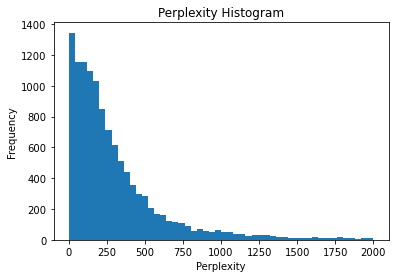

In [23]:
# Create histogram over perplexity

plt.hist(list_of_perplexity, bins = 50, range =(0,2000))
plt.xlabel('Perplexity')
plt.ylabel('Frequency')
plt.title('Perplexity Histogram')
plt.show()


In [24]:
#we will take the first quantile as the threshold for self-training	sentences, this will add around 3000 sentences to 
#our training set, which is 1/3 of the original training set. Also, looking at the hist, it seems like 
#a good idea

# Calculate the first quantile
quantile = np.percentile(list_of_perplexity, 25)


# Get the sentences index that have a perplexity below the quantile
quantile_sentences = [index for index, sent in enumerate(validation_data_bigrams) if lm.perplexity(sent) < quantile]
quantile, len(quantile_sentences)

(97.0490484022697, 4377)

In [26]:
# # Save the sentences that have a perplexity below the quantile to a file
# with open(FILE_PATH_2, 'r', encoding = 'utf-8') as f:
#     lines = f.readlines()

# # Save lines to a new file if they have a perplexity below the quantile
# with open('data/hate/offensive_sentences_text.txt', 'w') as f:
#     for index in quantile_sentences:
#         f.write(lines[index])

